# UNDERSTANDING NEURAL NETWORKS FROM SCRATCH USING MNIST DATASET

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time

### LOAD DATA

In [2]:
mnist = fetch_openml('mnist_784', version=1)

Split data into X & y. 'y' contains the labels, 'X' contains the features.

In [3]:
X, y = mnist['data'], mnist['target']
print('Shape of X:', X.shape, '\n', 'Shape of y:', y.shape)

Shape of X: (70000, 784) 
 Shape of y: (70000,)


### VISUALTIZE THE DATA

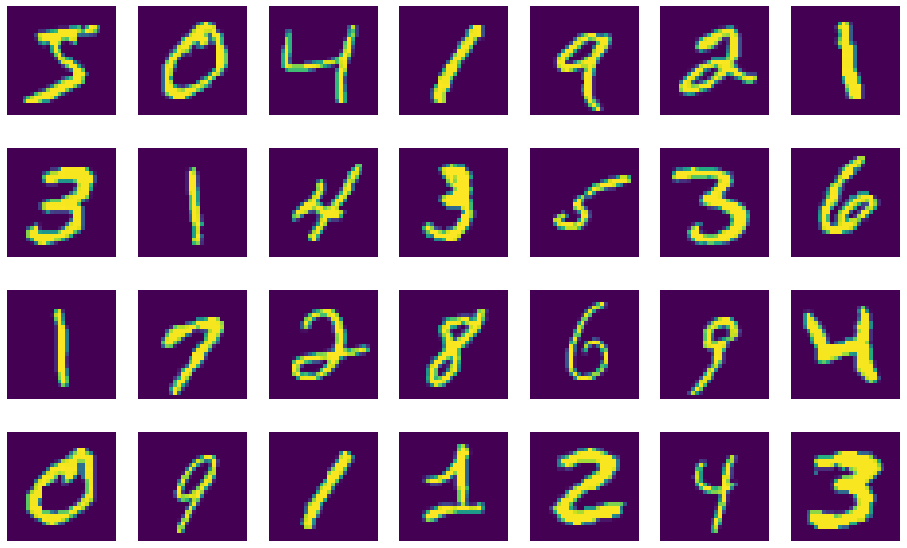

In [4]:
n_row = 4
n_col = 7

# Plot handwritten digits
plt.figure(figsize=(16,10))
for i in list(range(n_row * n_col)):
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    digit = X[i]
    digit_pixels = digit.reshape(28, 28)
    plt.imshow(digit_pixels)
    plt.axis('off')
plt.show()

Let's see what values of the pixels of the first digit

In [5]:
#first digit
y[0]

'5'

In [6]:
#pixel values of the first digit
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

As we can see from above the values are between 0-255 (R-G-B values).

Let's normalize the pixel values by diving it by 255. Now we will have all the pixel values ranging from 0-1. 

In [7]:
X = (X/255).astype('float32')

In [8]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### ONE HOT ENCODING

Now let's one-hot-encode the labels.

1 will be [1,0,0,0,0,0,0,0,0,0]

2 will be [0,1,0,0,0,0,0,0,0,0] and so on.

In [9]:
y = to_categorical(y)

### SPLIT DATASET INTO TRAIN & TEST

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### BUILD MODEL

Let's define the Sigmoid activation function.

In [11]:
def sigmoid(self, x, derivative=False):
    if derivative:
        return (np.exp(-x))/((np.exp(-x)+1)**2)
    return 1/(1 + np.exp(-x))

Let's define Softmax activation

In [12]:
def softmax(self, x):
    exps = np.exp(x - x.max())
    return exps / np.sum(exps, axis=0)

Initilazie the Neural Network input and hidden layers.

In [13]:
def initialization(self):
    # number of nodes in each layer
    input_layer=self.sizes[0]
    hidden_1=self.sizes[1]
    hidden_2=self.sizes[2]
    output_layer=self.sizes[3]

    params = {
        'W1':np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
        'W2':np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
        'W3':np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
    }

    return params

### FORWARD PASS

In [14]:
def forward_pass(self, x_train):
    params = self.params

    # input layer activations becomes sample
    params['A0'] = x_train

    # input layer to hidden layer 1
    params['Z1'] = np.dot(params["W1"], params['A0'])
    params['A1'] = self.sigmoid(params['Z1'])

    # hidden layer 1 to hidden layer 2
    params['Z2'] = np.dot(params["W2"], params['A1'])
    params['A2'] = self.sigmoid(params['Z2'])

    # hidden layer 2 to output layer
    params['Z3'] = np.dot(params["W3"], params['A2'])
    params['A3'] = self.softmax(params['Z3'])

    return params['A3']

### BACK PROP

In [15]:
def backward_pass(self, y_train, output):
    '''
        This is the backpropagation algorithm, for calculating the updates
        of the neural network's parameters.
    '''
    params = self.params
    change_w = {}

    # Calculate W3 update
    error = output - y_train
    change_w['W3'] = np.dot(error, params['A3'])

    # Calculate W2 update
    error = np.multiply( np.dot(params['W3'].T, error), self.sigmoid(params['Z2'], derivative=True) )
    change_w['W2'] = np.dot(error, params['A2'])

    # Calculate W1 update
    error = np.multiply( np.dot(params['W2'].T, error), self.sigmoid(params['Z1'], derivative=True) )
    change_w['W1'] = np.dot(error, params['A1'])

    return change_w

### UPDATE PARAMS

In [16]:
def update_network_parameters(self, changes_to_w):
    '''
        Update network parameters according to update rule from
        Stochastic Gradient Descent.
    '''

    for key, value in changes_to_w.items():
        for w_arr in self.params[key]:
            w_arr -= self.l_rate * value

### FULL CODE

In [19]:
from sklearn.datasets import fetch_openml
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
import time

x, y = fetch_openml('mnist_784', version=1, return_X_y=True)
x = (x/255).astype('float32')
y = to_categorical(y)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=42)

class DeepNeuralNetwork():
    def __init__(self, sizes, epochs=10, l_rate=0.001):
        self.sizes = sizes
        self.epochs = epochs
        self.l_rate = l_rate

        # we save all parameters in the neural network in this dictionary
        self.params = self.initialization()

    def sigmoid(self, x, derivative=False):
        if derivative:
            return (np.exp(-x))/((np.exp(-x)+1)**2)
        return 1/(1 + np.exp(-x))

    def softmax(self, x):
        # Numerically stable with large exponentials
        exps = np.exp(x - x.max())
        return exps / np.sum(exps, axis=0)

    def initialization(self):
        # number of nodes in each layer
        input_layer=self.sizes[0]
        hidden_1=self.sizes[1]
        hidden_2=self.sizes[2]
        output_layer=self.sizes[3]

        params = {
            'W1':np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
            'W2':np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
            'W3':np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
        }

        return params

    def forward_pass(self, x_train):
        params = self.params

        # input layer activations becomes sample
        params['A0'] = x_train

        # input layer to hidden layer 1
        params['Z1'] = np.dot(params["W1"], params['A0'])
        params['A1'] = self.sigmoid(params['Z1'])

        # hidden layer 1 to hidden layer 2
        params['Z2'] = np.dot(params["W2"], params['A1'])
        params['A2'] = self.sigmoid(params['Z2'])

        # hidden layer 2 to output layer
        params['Z3'] = np.dot(params["W3"], params['A2'])
        params['A3'] = self.softmax(params['Z3'])

        return params['A3']

    def backward_pass(self, y_train, output):
        '''
            This is the backpropagation algorithm, for calculating the updates
            of the neural network's parameters.
        '''
        params = self.params
        change_w = {}

        # Calculate W3 update
        error = output - y_train
        change_w['W3'] = np.dot(error, params['A3'])

        # Calculate W2 update
        error = np.multiply( np.dot(params['W3'].T, error), self.sigmoid(params['Z2'], derivative=True) )
        change_w['W2'] = np.dot(error, params['A2'])

        # Calculate W1 update
        error = np.multiply( np.dot(params['W2'].T, error), self.sigmoid(params['Z1'], derivative=True) )
        change_w['W1'] = np.dot(error, params['A1'])

        return change_w

    def update_network_parameters(self, changes_to_w):
        '''
            Update network parameters according to update rule from
            Stochastic Gradient Descent.

        '''
        
        for key, value in changes_to_w.items():
            for w_arr in self.params[key]:
                w_arr -= self.l_rate * value

    def compute_accuracy(self, x_val, y_val):
        '''
            This function does a forward pass of x, then checks if the indices
            of the maximum value in the output equals the indices in the label
            y. Then it sums over each prediction and calculates the accuracy.
        '''
        predictions = []

        for x, y in zip(x_val, y_val):
            output = self.forward_pass(x)
            pred = np.argmax(output)
            predictions.append(pred == y)
        
        summed = sum(pred for pred in predictions) / 100.0
        return np.average(summed)

    def train(self, x_train, y_train, x_val, y_val):
        start_time = time.time()
        for iteration in range(self.epochs):
            for x,y in zip(x_train, y_train):
                output = self.forward_pass(x)
                changes_to_w = self.backward_pass(y, output)
                self.update_network_parameters(changes_to_w)
            
            accuracy = self.compute_accuracy(x_val, y_val)
            print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2}'.format(
                iteration+1, time.time() - start_time, accuracy
            ))

In [20]:
%%time
dnn = DeepNeuralNetwork(sizes=[784, 128, 64, 10])
dnn.train(X_train, y_train, X_test, y_test)

Epoch: 1, Time Spent: 51.25s, Accuracy: 11.992999999999999
Epoch: 2, Time Spent: 101.09s, Accuracy: 12.800999999999998
Epoch: 3, Time Spent: 154.70s, Accuracy: 13.131
Epoch: 4, Time Spent: 209.45s, Accuracy: 13.285999999999998
Epoch: 5, Time Spent: 262.47s, Accuracy: 13.392000000000001
Epoch: 6, Time Spent: 313.91s, Accuracy: 13.454999999999998
Epoch: 7, Time Spent: 366.27s, Accuracy: 13.504
Epoch: 8, Time Spent: 423.03s, Accuracy: 13.532999999999998
Epoch: 9, Time Spent: 474.41s, Accuracy: 13.554999999999998
Epoch: 10, Time Spent: 523.56s, Accuracy: 13.581
CPU times: user 14min 23s, sys: 1min 3s, total: 15min 27s
Wall time: 8min 43s
